# Netflix_Data_Analysis

In [5]:
# Importing python libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
# Importing Data file
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Exploring data

In [3]:
df.shape

(8807, 12)

In [4]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Data Cleaning 

In [7]:
df['date added'] = pd.to_datetime(df['date_added'])

In [8]:
df[['director', 'cast', 'country', 'date_added', 'rating']] = df[['director', 'cast', 'country', 'date_added', 'rating']].fillna('unavailable')
df.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         3
listed_in        0
description      0
date added      10
dtype: int64

In [50]:
df[df.date_added.isnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   object        
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  date added    8797 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 894.6+ KB


In [53]:
most_recent_entry_date=df['date_added'].max()
df.fillna({'date_added': most_recent_entry_date}, inplace=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   object        
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  date added    8797 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 894.6+ KB


In [11]:
df.show_id

0          s1
1          s2
2          s3
3          s4
4          s5
        ...  
8802    s8803
8803    s8804
8804    s8805
8805    s8806
8806    s8807
Name: show_id, Length: 8807, dtype: object

In [12]:
df[df.show_id == 's8803']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date added
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019-11-20


In [13]:
df[df.duration.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date added
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017-04-04
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016-09-16
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,2016-08-15


In [14]:
df[df.director == 'Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date added
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017-04-04
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016-09-16
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,2016-08-15


In [15]:
df.loc[df['director'] == 'Louis C.K.', 'duration'] = df['rating']
df[df.director == 'Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date added
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017-04-04
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016-09-16
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...,2016-08-15


In [16]:
df.loc[df['director'] == 'Louis C.K.', 'rating'] = 'unavailable'
df[df.director == 'Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date added
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,unavailable,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017-04-04
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,unavailable,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016-09-16
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,unavailable,66 min,Movies,The comic puts his trademark hilarious/thought...,2016-08-15


# Data Visualization

In [17]:
df.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

Text(0.5, 1.0, 'count vs type of shows')

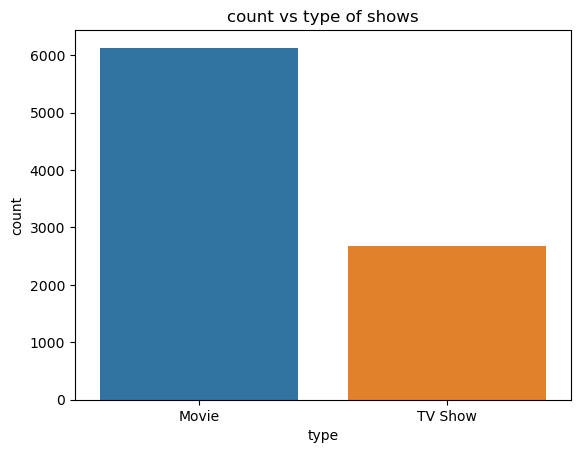

In [18]:
sns.countplot(x ='type', data = df)
plt.title('Count vs Type of shows')

In [19]:
df['country'].value_counts().head(10)

United States     2818
India              972
unavailable        831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: country, dtype: int64

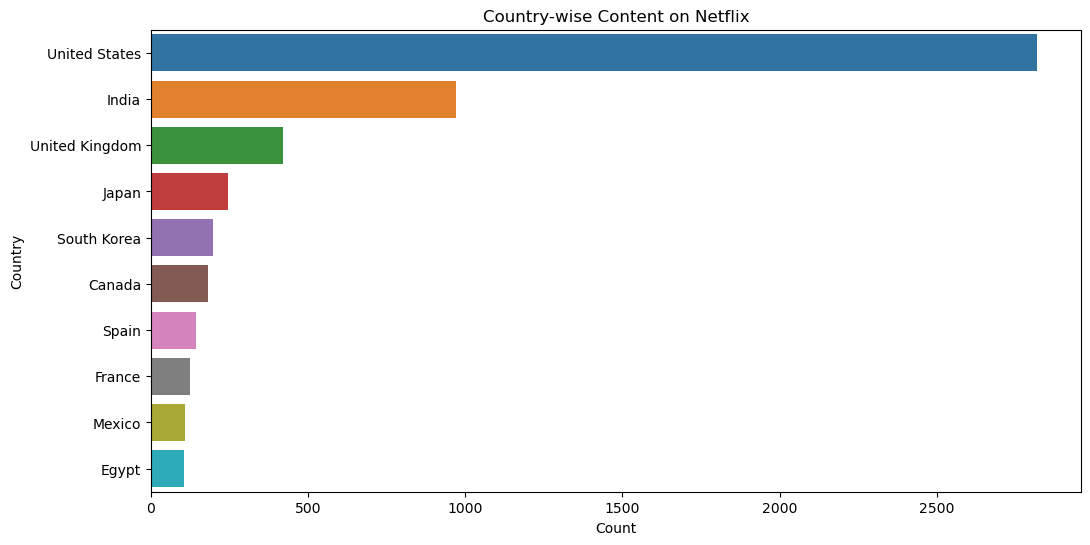

In [55]:
filtered_df = df[df['country'] != 'unavailable']  # Exclude rows with 'country' labeled as 'unavailable'

plt.figure(figsize=(12, 6))
sns.countplot(y='country', order=filtered_df['country'].value_counts().index[0:10], data=filtered_df)
plt.title('Country-wise Content on Netflix')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()


In [44]:
movie_countries = df[df['type'] == 'Movie']
tv_show_countries = df[df['type']=='TV Show'] 

In [45]:
movie_countries.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unavailable,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",unavailable,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021-09-24
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021-09-24
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021-09-24
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021-09-23


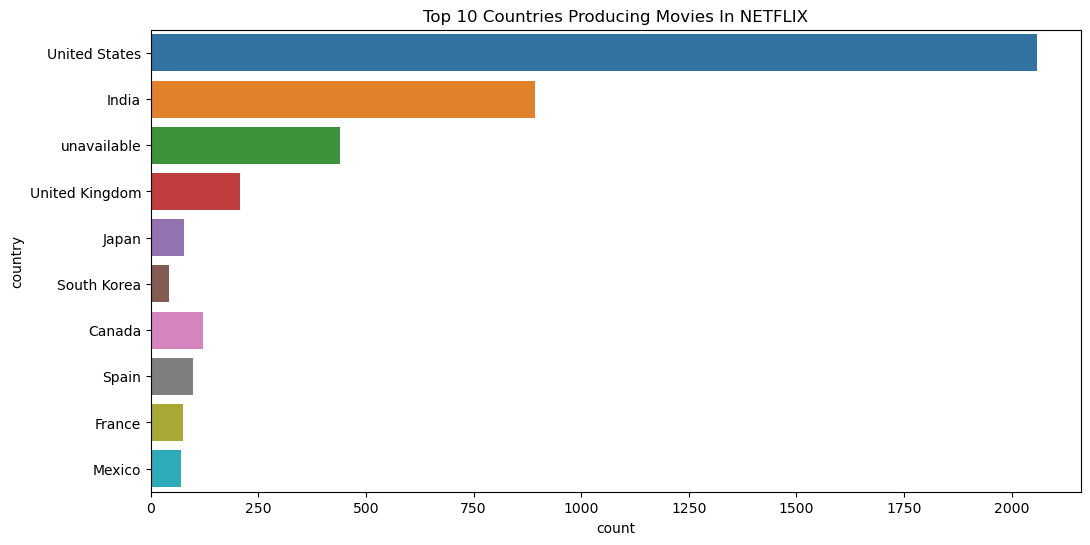

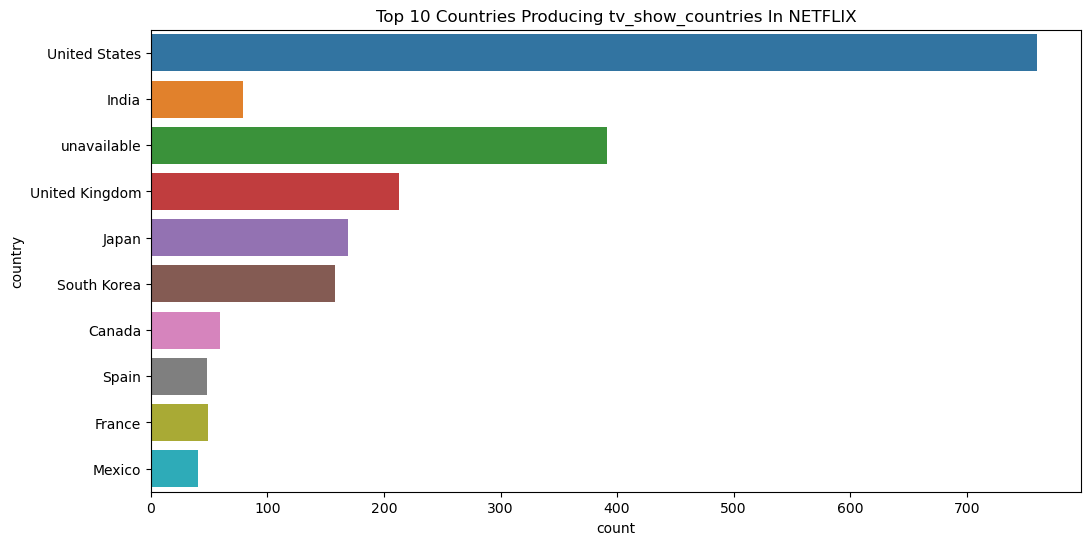

In [56]:

plt.figure(figsize = (12,6))
sns.countplot(y='country',order = df['country'].value_counts().index[0:10],data = movie_countries)
plt.title('Top 10 Countries Producing Movies In NETFLIX');

plt.figure(figsize = (12,6))
sns.countplot(y='country',order = df['country'].value_counts().index[0:10],data = tv_show_countries)
plt.title('Top 10 Countries Producing tv_show_countries In NETFLIX');


In [29]:
df.rating.value_counts()

TV-MA          3207
TV-14          2160
TV-PG           863
R               799
PG-13           490
TV-Y7           334
TV-Y            307
PG              287
TV-G            220
NR               80
G                41
unavailable       7
TV-Y7-FV          6
NC-17             3
UR                3
Name: rating, dtype: int64

Text(0.5, 1.0, 'Ratings of Shows on Netflix vs Count')

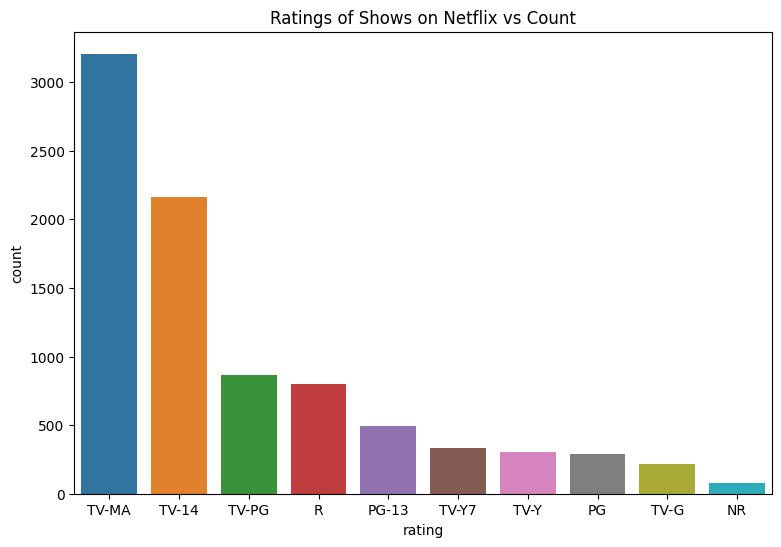

In [7]:
plt.figure(figsize = (9,6))
sns.countplot(x='rating', order =df['rating'].value_counts().index[0:10],data = df)
plt.title('Ratings of Shows on Netflix vs Count')

In [31]:
df.release_year.value_counts()[:20]

2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
2010     194
2011     185
2009     152
2008     136
2006      96
2007      88
2005      80
2004      64
2003      61
2002      51
Name: release_year, dtype: int64

Text(0.5, 1.0, 'Content Release in years on Netflix vs Count')

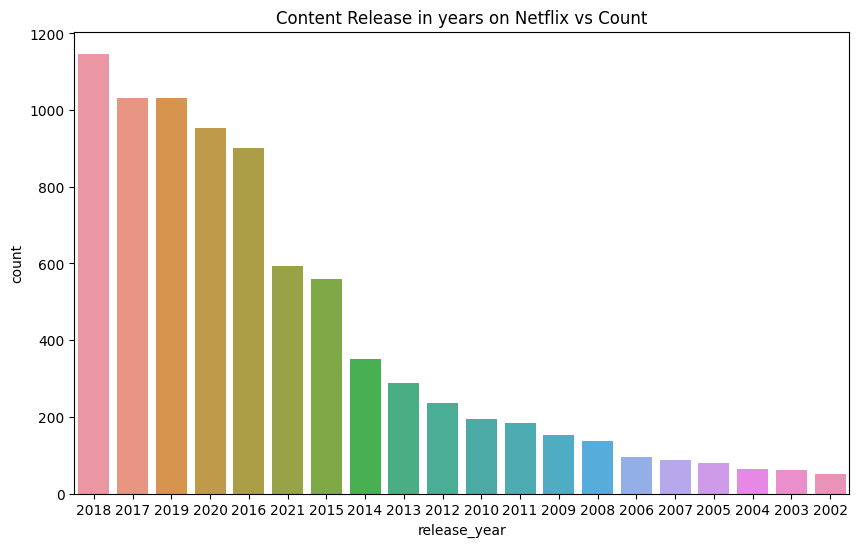

In [8]:
plt.figure(figsize = (10,6))
sns.countplot(x='release_year' , order = df['release_year'].value_counts().index[0:20],data = df)
plt.title('Content Release in years on Netflix vs Count')

Text(0.5, 1.0, 'Top 20 Genres on Netflix')

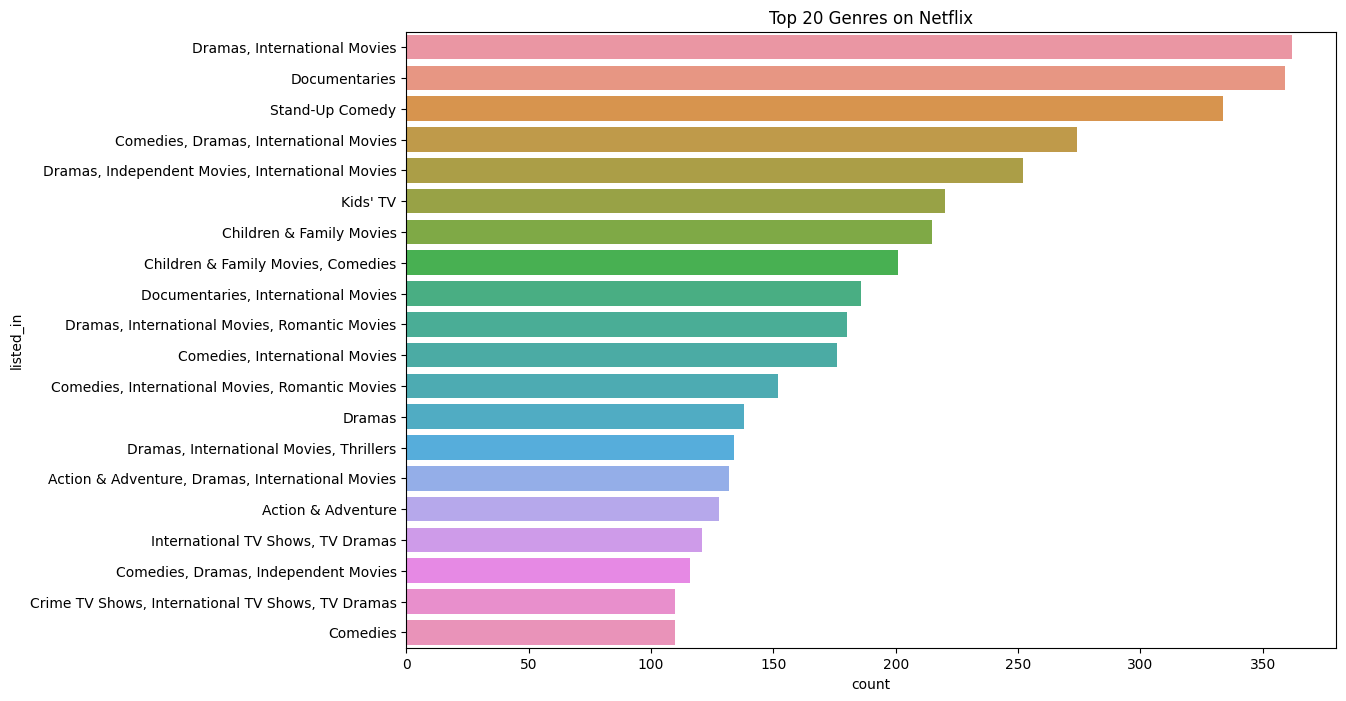

In [9]:
plt.figure(figsize = (12,8))
sns.countplot(y='listed_in',order = df['listed_in'].value_counts().index[0:20],data = df)
plt.title('Top 20 Genres on Netflix')

# Summary

*The Netflix Content Analysis project aims to analyze the vast catalog of content available on the Netflix streaming platform. By delving into the data encompassing various genres, regions, release years, and other relevant attributes, this project endeavors to uncover valuable insights and trends within Netflix's content library.